In [74]:
import numpy as np
import pandas as pd

In [75]:
# Features from rfe (features = 15)
# features = ['freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'chebyshev', 'braycurtis',
#        'canberra', 'cityblock', 'word_mover_distance', 'skew_q1', 'skew_q2',
#        'kurtosis_q2', 'cwc_min', 'cwc_max', 'csc_max', 'ctc_max',
#        'fuzz_partial_ratio', 'token_sort_ratio', 'token_set_ratio',
#        'longest_substr_ratio', 'is_duplicate']
features = ['q1len', 'q2len', 'chebyshev', 'canberra',
       'cityblock', 'word_mover_distance', 'skew_q1', 'skew_q2', 'cwc_max',
       'csc_max', 'ctc_max', 'token_set_ratio', 'longest_substr_ratio', 'is_duplicate']

In [76]:
df2 = pd.read_csv('undersampled_train_dataset.csv', usecols=features)
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2.dropna(how="any", inplace=True)

In [77]:
dataset2 = df2.values
X2 = dataset2[:, :-1]
Y2 = dataset2[:, -1:]

from sklearn.model_selection import train_test_split
X_train_2, X_valid_2, Y_train_2, Y_valid_2 = train_test_split(X2, Y2, test_size = 0.2, random_state = 42)

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_2)

X_train_std_2 = scaler.transform(X_train_2)
Y_train_2 = Y_train_2.ravel()

X_valid_std_2 = scaler.transform(X_valid_2)

In [79]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 8)
clf.fit(X_train_std_2, Y_train_2)
y_pred_2 = clf.predict(X_valid_std_2)

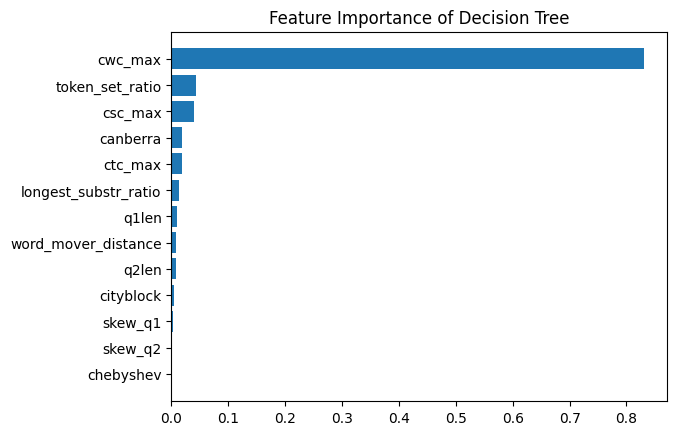

In [80]:
importances = clf.feature_importances_

indices = np.argsort(importances)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title('Feature Importance of Decision Tree')
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(features[:-1])[indices])

In [81]:
from sklearn.tree import plot_tree

clf_visual = DecisionTreeClassifier(max_depth=3)
clf_visual.fit(X_train_std_2, Y_train_2)

DecisionTreeClassifier(max_depth=3)

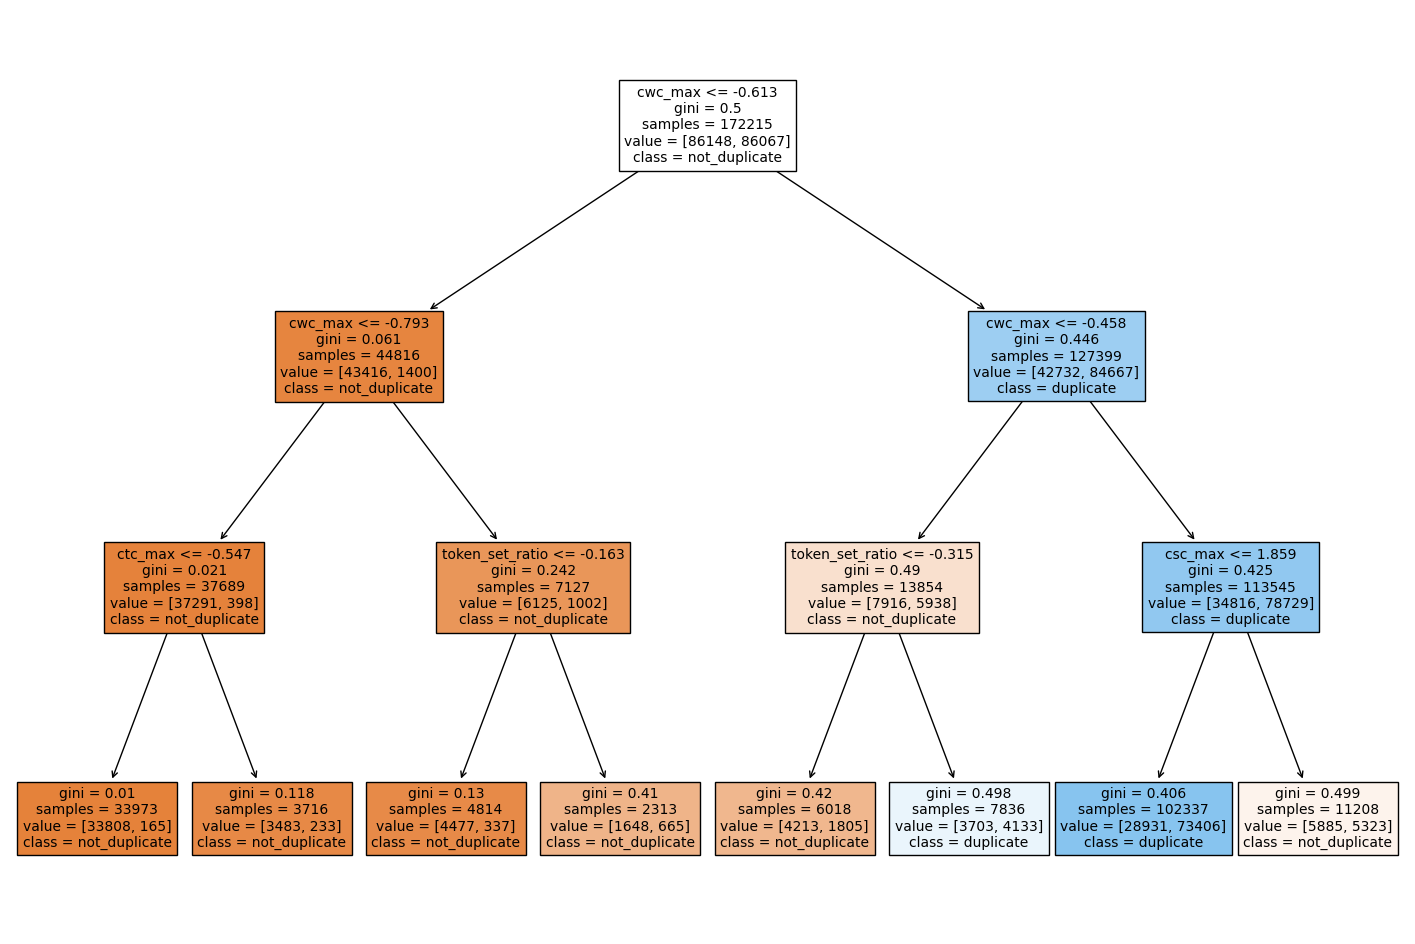

In [82]:
plt.figure(figsize=(18,12))
plot_tree(clf_visual, 
        feature_names=features,  
        class_names=['not_duplicate', 'duplicate'],
        fontsize=10,
        filled=True)
plt.show()

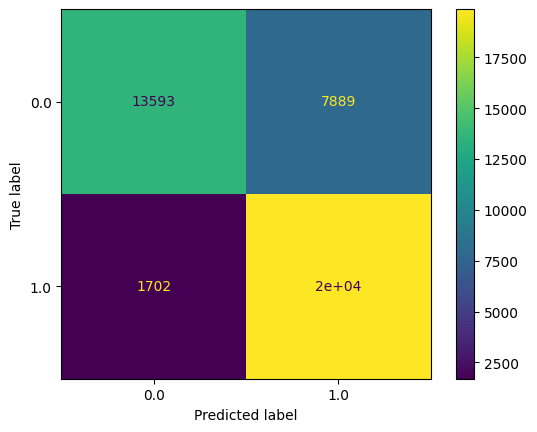

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(Y_valid_2, y_pred_2)
plt.show()

In [84]:
from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_valid_2, y_pred_2).ravel()
print(confusion_matrix(Y_valid_2, y_pred_2))
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(classification_report(Y_valid_2, y_pred_2))

[[13593  7889]
 [ 1702 19870]]
TN: 13593, FP: 7889, FN: 1702, TP: 19870
              precision    recall  f1-score   support

         0.0       0.89      0.63      0.74     21482
         1.0       0.72      0.92      0.81     21572

    accuracy                           0.78     43054
   macro avg       0.80      0.78      0.77     43054
weighted avg       0.80      0.78      0.77     43054



In [85]:
df_test_2 = pd.read_csv('undersampled_test_dataset.csv', usecols=features)
df_test_2.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test_2.dropna(how="any", inplace=True)

In [86]:
dataset_test_2 = df_test_2.values

In [87]:
X_test_2 = dataset_test_2[:, :-1]
Y_test_2 = dataset_test_2[:, -1:]

In [88]:
X_test_std_2 = scaler.transform(X_test_2)
y_test_pred_2 = clf.predict(X_test_std_2)

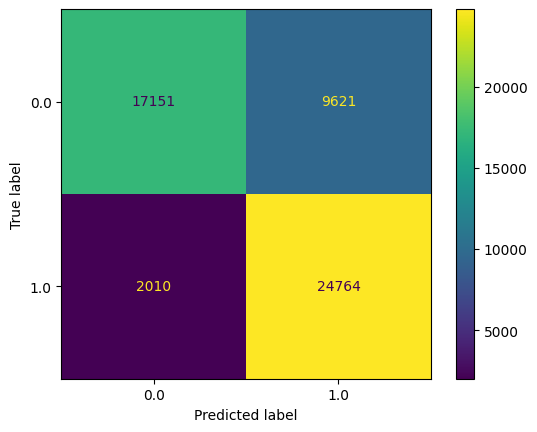

In [89]:
ConfusionMatrixDisplay.from_predictions(Y_test_2, y_test_pred_2)
plt.show()

In [90]:
from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test_2, y_test_pred_2).ravel()
print(confusion_matrix(Y_test_2, y_test_pred_2))
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(classification_report(Y_test_2, y_test_pred_2))

[[17151  9621]
 [ 2010 24764]]
TN: 17151, FP: 9621, FN: 2010, TP: 24764
              precision    recall  f1-score   support

         0.0       0.90      0.64      0.75     26772
         1.0       0.72      0.92      0.81     26774

    accuracy                           0.78     53546
   macro avg       0.81      0.78      0.78     53546
weighted avg       0.81      0.78      0.78     53546

